# Image Processing Project
### Project: Straighten the Image
### Group Members: Aoife, Kseniia, Luka
### Due Date : 27/11/2020

## Overview of Group Assignment


## Code
Step by Step of Code 

In [3]:
# Imports
import cv2, numpy as np
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
#import easygui # An easy-to-use file-picker; pip install easygui
import os
from skimage.transform import probabilistic_hough_line


In [57]:
# functions

# Hough
def printLinesToImage(img_P, lines):
    for x in range(0, len(lines)):
        for rho, theta in lines[x]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            
            cv2.line(img_P, (x1, y1), (x2, y2), (0, 255, 0), 2)

#blurred image
def blur_image(img_B, blur):
    blurred_img_gray = cv2.GaussianBlur(img_B, (blur, blur), 0)
    #blurred_img_gray = cv2.GaussianBlur(img_B, (5, 5), 0)
    plt.imshow(blurred_img_gray, cmap = plt.cm.gray)
    plt.show()
    cv2.imwrite("Grayscale_blur.jpg", blurred_img_gray)
    return blurred_img_gray

#Canny on grayscale image
def Canny(img_C):
    edges_gray = cv2.Canny(img_C, 99, 100)
    plt.imshow(edges_gray, cmap = plt.cm.gray)
    plt.show()
    cv2.imwrite("Canny_on_gray.jpg", edges_gray)
    return edges_gray

def finish(img_F, l):
    printLinesToImage(img_F, l)
    plt.imshow(img_F)
    plt.show()
    second = cv2.cvtColor(img_F, cv2.COLOR_RGB2BGR)
    cv2.imwrite("Result.jpg",second)

def read_in_image():
    # Original Image
    image = cv2.imread("H3.jpg", 1)
    #Convert to RGB
    img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.show()
    return img2


def Check_Single_Horizon_Line():
    blur_value = 5
    img2 = read_in_image()
    first_image_copy = img2.copy()
    second_image_copy = img2.copy()
    another_copy = img2.copy()
    copy_gray = cv2.cvtColor(another_copy, cv2.COLOR_BGR2GRAY)
    

    blur_image_res = blur_image(copy_gray, blur_value)
    gray_edges_result = Canny(blur_image_res)


    lines = cv2.HoughLines(gray_edges_result,1 , np.pi / 180, 100, 255)
    #print(len(lines))
    #print(lines)
    if(lines == None):
        while lines == None:
            print(blur_value)
            blur_value -= 2
            blur_image_res = blur_image(copy_gray, blur_value)
            gray_edges_result = Canny(blur_image_res)
            lines = cv2.HoughLines(gray_edges_result, 1, np.pi / 180, 100, 255)
            if(blur_value == 1 or len(lines) > 0):
                break;
    ## I think I should add an or here for when the blur_value reaches 1 and still no line to pass onto general algorithm aswell          
    elif(len(lines) > 1):
        print("Let call the function to start the general")
        
    if(len(lines) == 1):
        finish(img2, lines)
        #Send on to Analysis code here - will change the finish function to return the lines and the image with the line
        
    else:
        print("Could not analyse image for line detection")


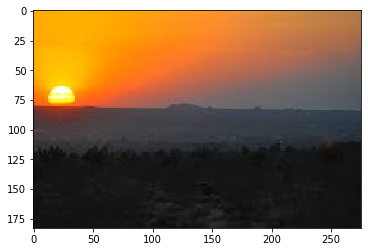

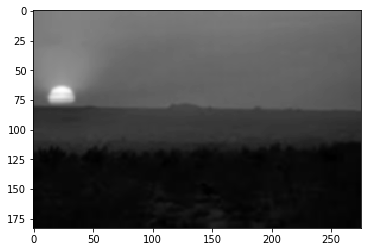

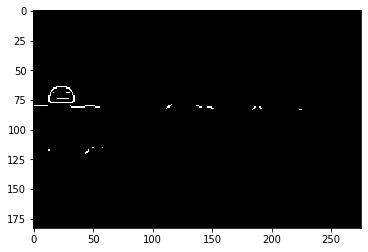

5


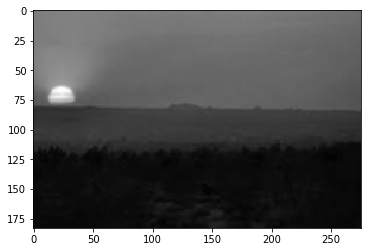

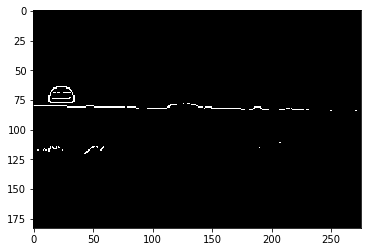

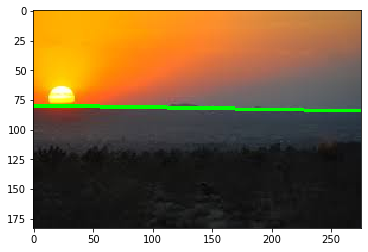

In [58]:
#Calling 
Check_Single_Horizon_Line()